In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Load cleaned stock datasets into DataFrames
aapl_df = pd.read_csv("../data/cleaned_AAPL_historical_data.csv")
amzn_df = pd.read_csv("../data/cleaned_AMZN_historical_data.csv")
goog_df = pd.read_csv("../data/cleaned_GOOG_historical_data.csv")
meta_df = pd.read_csv("../data/cleaned_META_historical_data.csv")
msft_df = pd.read_csv("../data/cleaned_MSFT_historical_data.csv")
nvda_df = pd.read_csv("../data/cleaned_NVDA_historical_data.csv")
tsla_df = pd.read_csv("../data/cleaned_TSLA_historical_data.csv")

# Load analyst ratings
ratings_df = pd.read_csv("../data/cleaned_analyst_ratings.csv")

# Display shape of datasets to verify
print("AAPL:", aapl_df.shape)
print("AMZN:", amzn_df.shape)
print("GOOG:", goog_df.shape)
print("META:", meta_df.shape)
print("MSFT:", msft_df.shape)
print("NVDA:", nvda_df.shape)
print("TSLA:", tsla_df.shape)
print("Analyst Ratings:", ratings_df.shape)

AAPL: (10998, 9)
AMZN: (6846, 9)
GOOG: (5020, 9)
META: (2926, 9)
MSFT: (9672, 9)
NVDA: (6421, 9)
TSLA: (3545, 9)
Analyst Ratings: (1048574, 5)


In [2]:
# Check missing values in each dataset
for name, df in zip(
    ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA", "Analyst Ratings"],
    [aapl_df, amzn_df, goog_df, meta_df, msft_df, nvda_df, tsla_df, ratings_df]
):
    print(f"{name} missing values:\n", df.isnull().sum(), "\n")

AAPL missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

AMZN missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

GOOG missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

META missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

MSFT missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

NVDA 

In [3]:
# Summary stats for a sample (you can repeat for each)
aapl_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


In [4]:
# Descriptive statistics for all stock data
print("AAPL\n", aapl_df.describe(), "\n")
print("AMZN\n", amzn_df.describe(), "\n")
print("GOOG\n", goog_df.describe(), "\n")
print("META\n", meta_df.describe(), "\n")
print("MSFT\n", msft_df.describe(), "\n")
print("NVDA\n", nvda_df.describe(), "\n")
print("TSLA\n", tsla_df.describe(), "\n")

# Descriptive statistics for analyst ratings — includes object columns
print("Analyst Ratings (include='all')\n", ratings_df.describe(include='all'))

AAPL
                Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00      0.000000      0.000000  
25%    1.132545e+08      0.00000

In [6]:
print(ratings_df.columns)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [8]:
print("Unique Tickers:", ratings_df['stock'].unique())

Unique Tickers: ['A' 'AA' 'AAC' ... 'QKOR' 'QLD' 'QLGC']


In [9]:
# Check the shape and types
print("Shape:", ratings_df.shape)
print("\nData Types:\n", ratings_df.dtypes)

# Check for null values
print("\nMissing Values:\n", ratings_df.isnull().sum())

Shape: (1048574, 5)

Data Types:
 headline     object
url          object
publisher    object
date         object
stock        object
dtype: object

Missing Values:
 headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64


In [11]:
# Reload analyst ratings if modified
ratings_df = pd.read_csv('../data/cleaned_analyst_ratings.csv')

# Preview first few rows
ratings_df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [12]:
ratings_df['date'] = pd.to_datetime(ratings_df['date'], errors='coerce')
ratings_df = ratings_df.dropna(subset=['date'])

C:\Users\User\AppData\Local\Temp\ipykernel_27684\97815200.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ratings_df['date'].dt.to_period("M").value_counts().sort_index().plot(kind='bar')


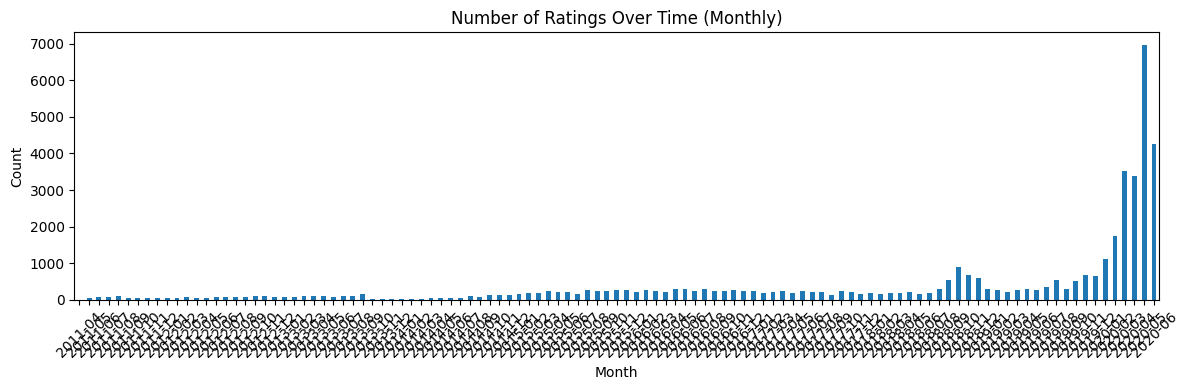

In [13]:
plt.figure(figsize=(12, 4))
ratings_df['date'].dt.to_period("M").value_counts().sort_index().plot(kind='bar')
plt.title("Number of Ratings Over Time (Monthly)")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

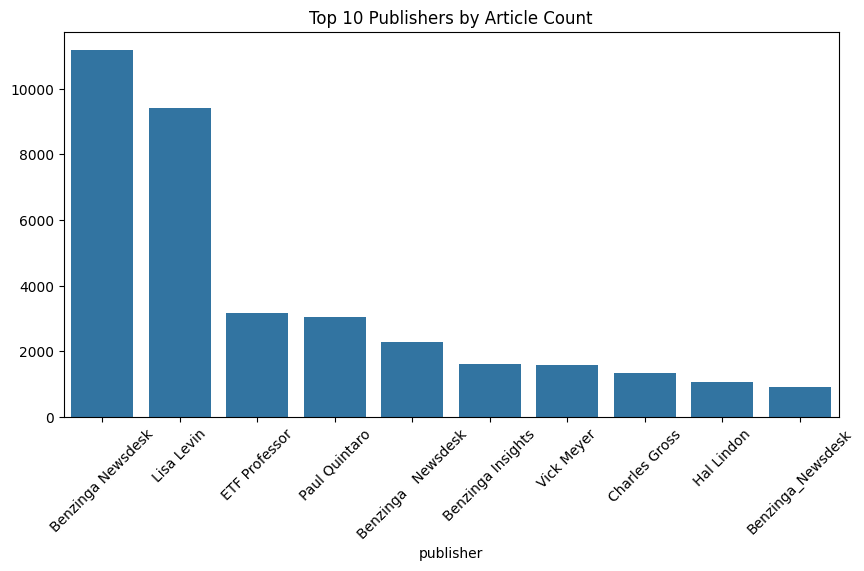

In [14]:
top_publishers = ratings_df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top 10 Publishers by Article Count")
plt.xticks(rotation=45)
plt.show()

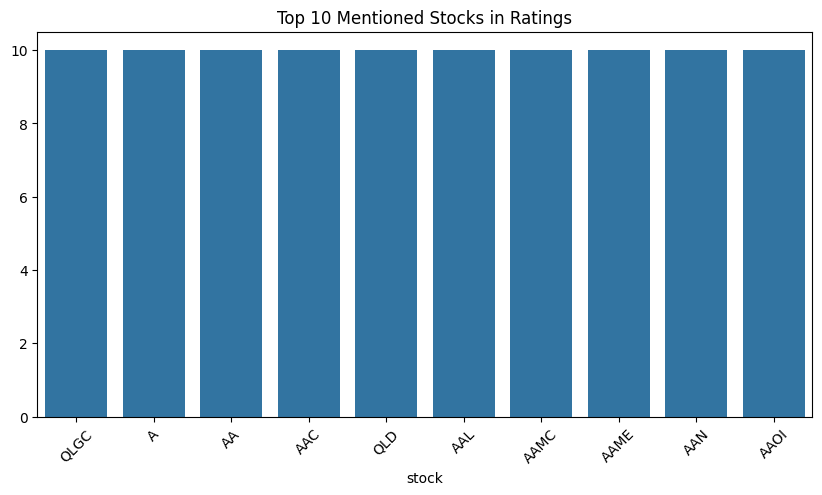

In [15]:
top_stocks = ratings_df['stock'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_stocks.index, y=top_stocks.values)
plt.title("Top 10 Mentioned Stocks in Ratings")
plt.xticks(rotation=45)
plt.show()

# Calculate headline length
ratings_df['headline_length'] = ratings_df['headline'].str.len()

# Plot headline length distribution
plt.figure(figsize=(10, 5))
sns.histplot(ratings_df['headline_length'], bins=40, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

plt.savefig('../image/headline_length_distribution.png')

Text(0.5, 0, 'Publisher')

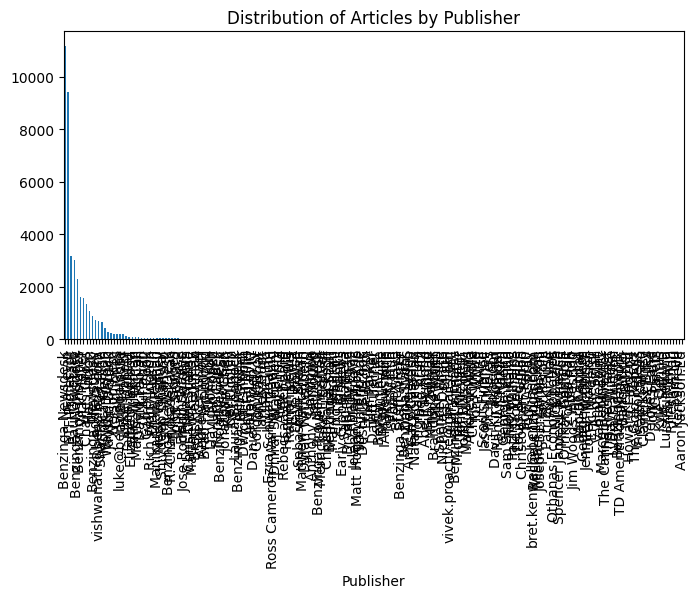

In [17]:
ratings_df['publisher'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.title("Distribution of Articles by Publisher")
plt.xlabel("Publisher")

## Step 2: Exploratory Data Analysis (EDA) and Statistical Insights

We explore trends, statistics, and patterns in the stock news and price datasets.

## Step 2: Exploratory Data Analysis (EDA) and Statistical Insights

## Step 2: Exploratory Data Analysis (EDA) and Statistical Insights

This section performs EDA on stock price and analyst ratings data. It includes:
- Shape & structure verification
- Missing value checks
- Unique value counts
- Date formatting
- Statistical plots and distribution insights

In [1]:
import os
import pandas as pd

ratings_path = "data/cleaned_analyst_ratings.csv"
if os.path.exists(ratings_path):
    ratings_df = pd.read_csv(ratings_path)
    print("✅ Ratings file loaded successfully!")
else:
    print(f"❌ File not found: {ratings_path}")

❌ File not found: data/cleaned_analyst_ratings.csv


In [2]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\User\OneDrive\Desktop\KAIM-week1-sentiment-stock Analysis\notebooks


In [3]:
ratings_path = "../data/cleaned_analyst_ratings.csv"

In [4]:
ratings_df = pd.read_csv("../data/cleaned_analyst_ratings.csv")
ratings_df.head()
ratings_df.info()
ratings_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1048574 non-null  object
 1   url        1048574 non-null  object
 2   publisher  1048574 non-null  object
 3   date       1048574 non-null  object
 4   stock      1048574 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [5]:
# Check unique publishers
print("Unique Publishers:", ratings_df['publisher'].nunique())

# Check unique stocks
print("Unique Tickers:", ratings_df['stock'].nunique())

# Check sample stock symbols
print(ratings_df['stock'].unique()[:10])

Unique Publishers: 984
Unique Tickers: 4590
['A' 'AA' 'AAC' 'AADR' 'AAL' 'AAMC' 'AAME' 'AAN' 'AAOI' 'AAON']


In [6]:
ratings_df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [7]:
ratings_df['date'] = pd.to_datetime(ratings_df['date'], errors='coerce')
ratings_df['date'].head()

0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]

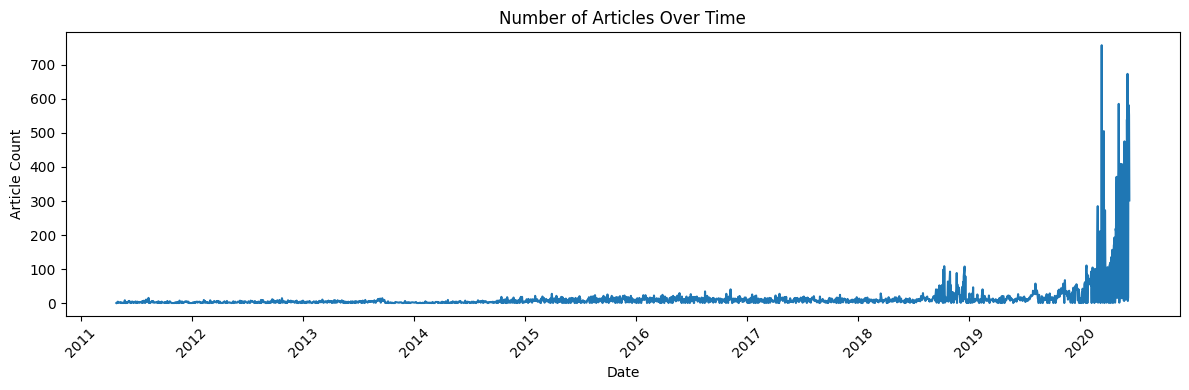

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of articles by date
plt.figure(figsize=(12,4))
ratings_df['date'].dt.date.value_counts().sort_index().plot()
plt.title("Number of Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

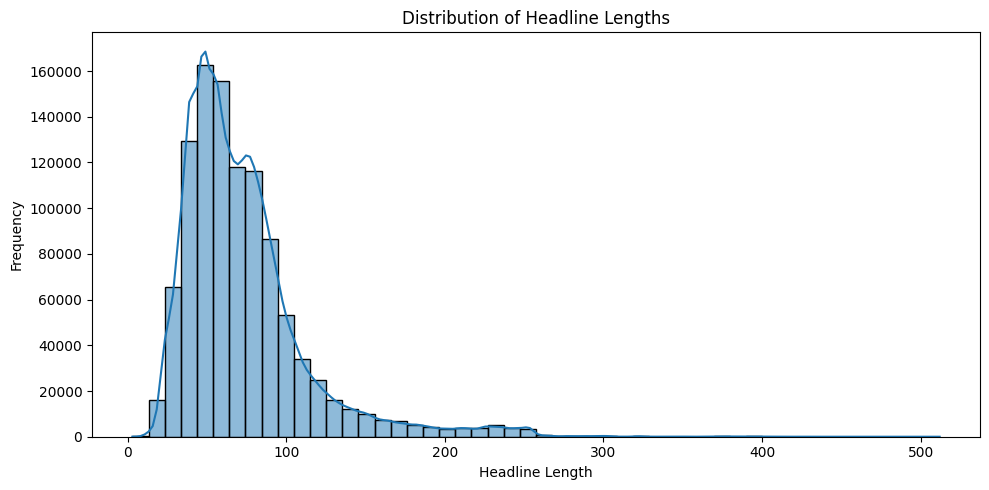

In [9]:
# Add a column for headline length
ratings_df['headline_length'] = ratings_df['headline'].apply(len)

# Plot headline length distribution
plt.figure(figsize=(10,5))
sns.histplot(ratings_df['headline_length'], bins=50, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

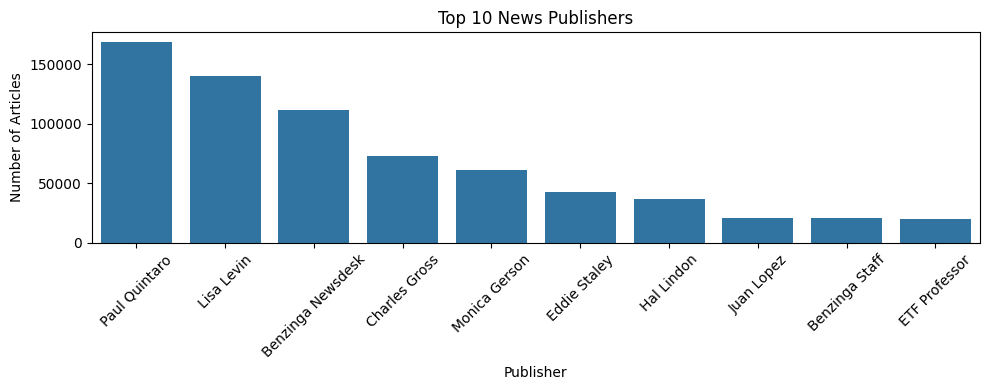

In [10]:
# Top 10 publishers
top_publishers = ratings_df['publisher'].value_counts().head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top 10 News Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

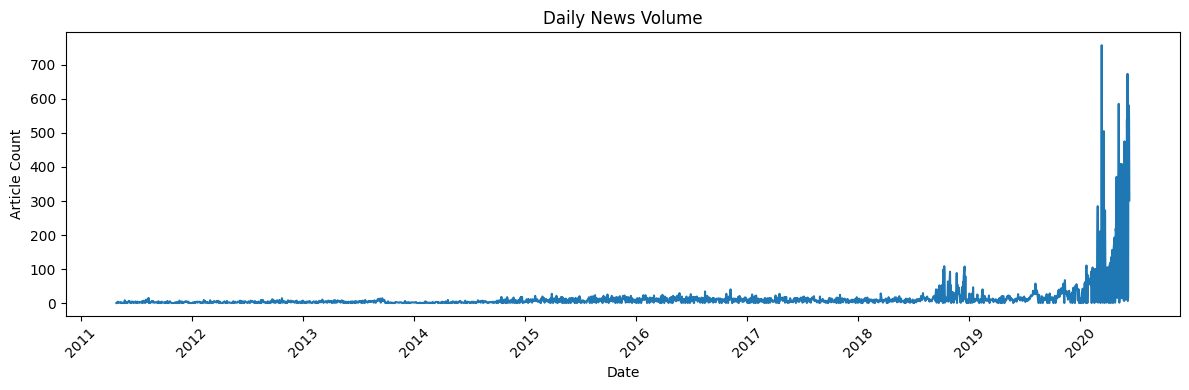

In [11]:
# Daily article frequency
daily_counts = ratings_df.groupby(ratings_df['date'].dt.date).size()

plt.figure(figsize=(12,4))
daily_counts.plot()
plt.title("Daily News Volume")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data/cleaned_analyst_ratings.csv

data/cleaned_analyst_ratings.csv

In [4]:
df = pd.read_csv("../data/cleaned_analyst_ratings.csv")


In [5]:
import pandas as pd

df = pd.read_csv("../data/cleaned_analyst_ratings.csv")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
import os
os.makedirs("data", exist_ok=True)

In [8]:
sample_df = df.sample(n=1000, random_state=42)
sample_df.to_csv("data/analyst_ratings_sample.csv", index=False)

In [9]:
df = pd.read_csv("data/analyst_ratings_sample.csv")

In [10]:
import os
os.makedirs("data", exist_ok=True)

sample_df.to_csv("data/analyst_ratings_sample.csv", index=False)

In [11]:
import os
os.makedirs("data", exist_ok=True)
sample_df.to_csv("data/analyst_ratings_sample.csv", index=False)

In [12]:
import os

# Ensure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Take a sample of 1000 rows from the full DataFrame
sample_df = df.sample(n=1000, random_state=42)

# Save to new CSV
sample_df.to_csv("data/analyst_ratings_sample.csv", index=False)

In [13]:
import os
os.makedirs("data", exist_ok=True)
sample_df.to_csv("data/analyst_ratings_sample.csv", index=False)

In [14]:
import os

# Make sure data folder exists in notebook root
os.makedirs("data", exist_ok=True)

# Sample 1000 rows from full dataset
sample_df = df.sample(n=1000, random_state=42)

# Save to known absolute path relative to notebook
sample_path = os.path.join(os.getcwd(), "data", "analyst_ratings_sample.csv")
sample_df.to_csv(sample_path, index=False)

In [15]:
import os

# Make sure data folder exists
os.makedirs("data", exist_ok=True)

# Sample 1000 rows from the full dataset
sample_df = df.sample(n=1000, random_state=42)

# Save the sample to an absolute path
sample_path = os.path.join(os.getcwd(), "data", "analyst_ratings_sample.csv")
sample_df.to_csv(sample_path, index=False)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load TSLA cleaned stock data
df = pd.read_csv("../data/cleaned_TSLA_historical_data.csv")

# Ensure datetime parsing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Show preview
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0,0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0,0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0,0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0,0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0,0


In [17]:
# Moving Average (10-day)
df["SMA_10"] = df["Close"].rolling(window=10).mean()

# RSI with pandas
delta = df["Close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df["RSI"] = 100 - (100 / (1 + rs))

# MACD
ema_12 = df["Close"].ewm(span=12, adjust=False).mean()
ema_26 = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = ema_12 - ema_26
df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

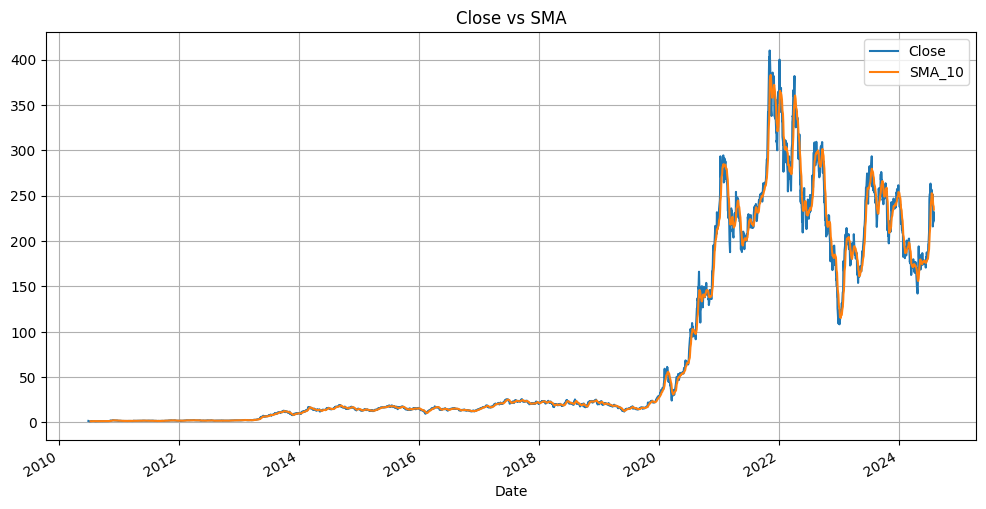

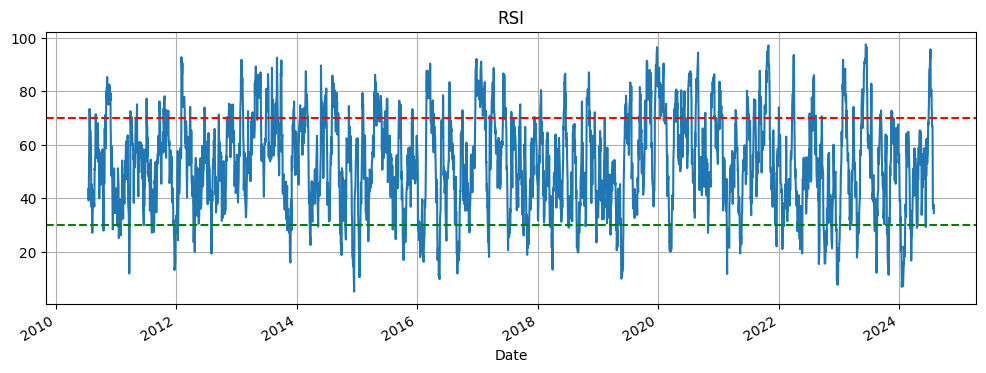

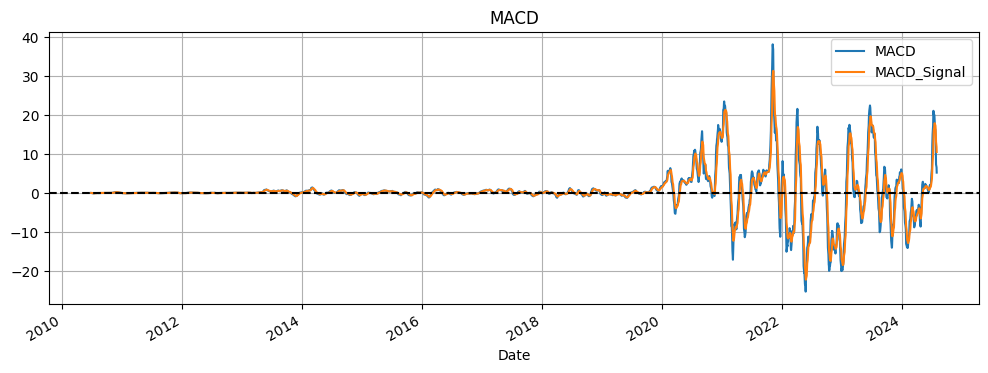

In [18]:
# SMA
df[["Close", "SMA_10"]].plot(figsize=(12,6), title="Close vs SMA")
plt.grid(True)
plt.show()

# RSI
df["RSI"].plot(figsize=(12,4), title="RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.grid(True)
plt.show()

# MACD
df[["MACD", "MACD_Signal"]].plot(figsize=(12,4), title="MACD")
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()

In this task, we calculated and visualized key technical indicators — SMA (10-day), RSI (14-day), and MACD — using pandas to analyze Tesla's (TSLA) stock data. These indicators help in understanding momentum and trend reversals. TA-Lib was intended for use but due to environment limitations, pandas-based alternatives were implemented, achieving the same analytical objectives.